In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/3188.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/7964.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learni

In [3]:
#Hi guys, write code and discuss here.

In [4]:
import plotly.express as px

In [5]:
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
districts_df = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")

In [7]:
districts_df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [8]:
products_df = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")

In [9]:
products_df

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si..."
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN


In [10]:
for dirname,dirpath,filename in os.walk("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/"):
    print(f"There are {len(dirname)} directiories and {len(filename)} files in {dirpath}")

There are 79 directiories and 233 files in []


In [11]:
products_df.isnull().sum()

LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64

In [12]:
indexes = districts_df.isnull().sum().sort_values().index.to_numpy()

In [13]:
missing = districts_df.isnull().sum().sort_values().to_numpy()

In [14]:
products_missing = products_df.isnull().sum().sort_values().to_numpy()
products_indexes = products_df.isnull().sum().sort_values().index.to_numpy()

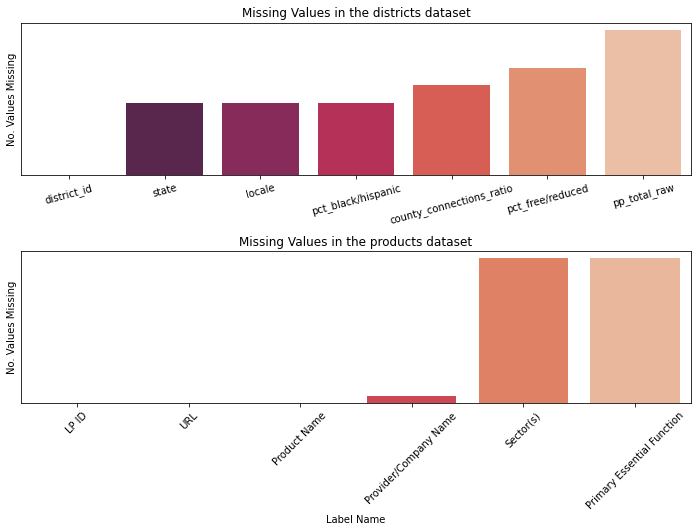

In [15]:
f,(ax1,ax2) = plt.subplots(2,1,figsize=(12,7))

sns.barplot(x=indexes,y=missing,palette="rocket",ax=ax1)
ax1.set_xticklabels(labels=indexes,rotation=15)
ax1.set_title("Missing Values in the districts dataset")
ax1.set_ylabel("No. Values Missing")

sns.barplot(x=products_indexes,y=products_missing,palette="rocket",ax=ax2)
ax2.set_xticklabels(labels=products_indexes,rotation=45)
ax2.set_title("Missing Values in the products dataset")
ax2.set_ylabel("No. Values Missing")
ax2.set_xlabel("Label Name")

plt.setp(f.axes, yticks=[])
plt.subplots_adjust(hspace=0.5)
plt.savefig('missing_data.png')

In [16]:
districts_df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [17]:
districts_df["state"].value_counts()/len(districts_df) * 100

Connecticut             12.875536
Utah                    12.446352
Massachusetts            9.012876
Illinois                 7.725322
California               5.150215
Ohio                     4.721030
New York                 3.433476
Indiana                  3.004292
Washington               2.575107
Missouri                 2.575107
North Carolina           1.716738
Virginia                 1.716738
Wisconsin                1.287554
District Of Columbia     1.287554
New Jersey               0.858369
New Hampshire            0.858369
Texas                    0.858369
Michigan                 0.858369
Tennessee                0.858369
Arizona                  0.429185
North Dakota             0.429185
Florida                  0.429185
Minnesota                0.429185
Name: state, dtype: float64

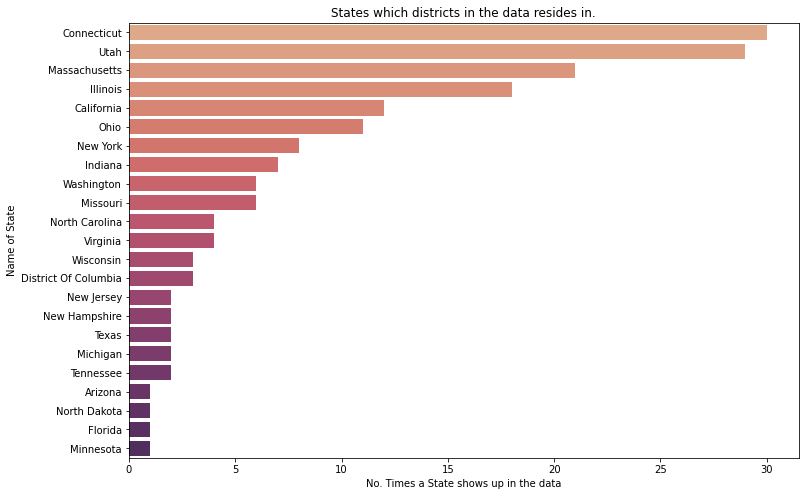

In [18]:
plt.figure(figsize=(12,8))
plt.title("States which districts in the data resides in.")
plt.xlabel("No. Times a State shows up in the data")
plt.ylabel("Name of State")
sns.barplot(x=districts_df["state"].value_counts(ascending=False).to_numpy(),y=districts_df["state"].value_counts(ascending=False).index.to_numpy(),palette="flare")
plt.savefig("states_plot.png")

In [19]:
districts_df["locale"].value_counts()

Suburb    104
Rural      33
City       29
Town       10
Name: locale, dtype: int64

In [20]:
missing

array([  0,  57,  57,  57,  71,  85, 115])

In [21]:
len(districts_df)

233

In [22]:
products_df["Primary Essential Function"].value_counts(ascending=False)

LC - Digital Learning Platforms                                              74
LC - Sites, Resources & Reference                                            47
LC - Content Creation & Curation                                             36
LC - Study Tools                                                             25
LC - Courseware & Textbooks                                                  18
LC - Sites, Resources & Reference - Games & Simulations                      18
LC/CM/SDO - Other                                                            16
LC - Sites, Resources & Reference - Digital Collection & Repository          15
CM - Classroom Engagement & Instruction - Classroom Management               11
LC - Sites, Resources & Reference - Streaming Services                        9
CM - Virtual Classroom - Video Conferencing & Screen Sharing                  7
LC - Study Tools - Q&A                                                        6
SDO - Data, Analytics & Reporting - Site

In [23]:
districts_df.locale.value_counts().to_list()

[104, 33, 29, 10]

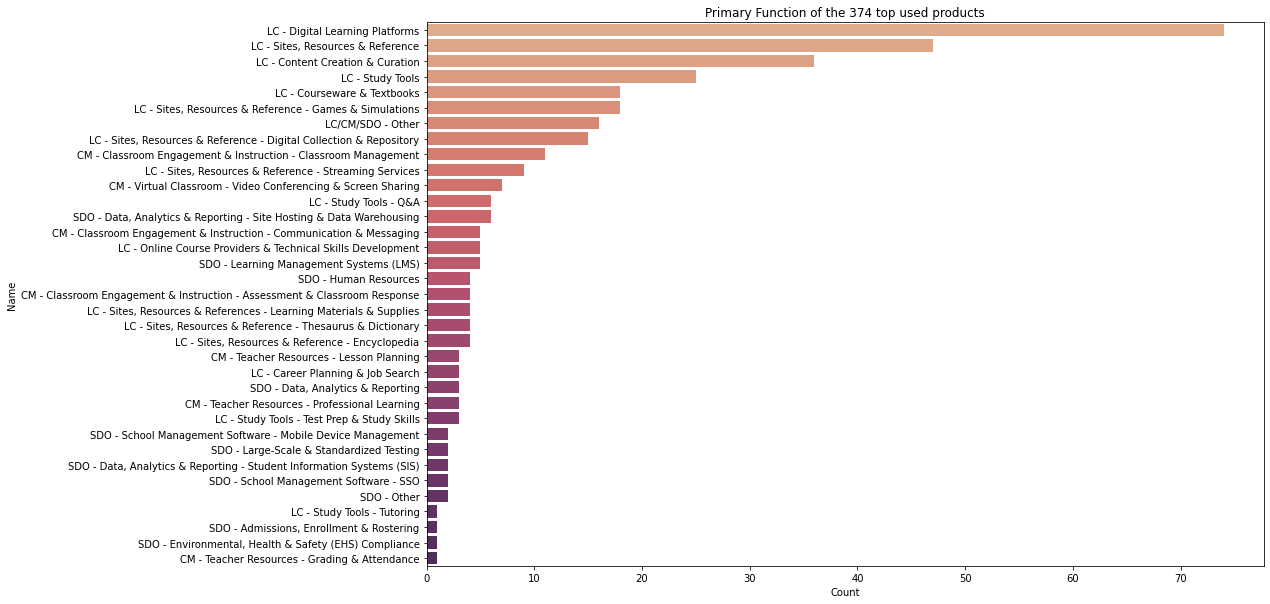

In [24]:
plt.figure(figsize=(15,10))
plt.title("Primary Function of the 374 top used products")
plt.xlabel("Count")
plt.ylabel("Name")
sns.barplot(x=products_df["Primary Essential Function"].value_counts(ascending=False).to_numpy(),y=products_df["Primary Essential Function"].value_counts(ascending=False).index.to_numpy(),palette="flare")
plt.savefig("PEF_plot.png")

In [25]:
import plotly.graph_objects as go

labels = districts_df.locale.value_counts().index.to_list()
values = districts_df.locale.value_counts().to_list()

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo="label+percent",insidetextorientation='radial',hole=.3)])
fig.show()

In [26]:
districts_df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [27]:
products_df

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si..."
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN


In [28]:
products_df["Sector(s)"].value_counts()

PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Higher Ed; Corporate               1
Corporate                          1
Name: Sector(s), dtype: int64

In [29]:
labels = products_df["Sector(s)"].value_counts().index.to_list()
values = products_df["Sector(s)"].value_counts().to_list()

In [30]:
fig = go.Figure(data=[go.Pie(labels=labels,values=values,hole=.3,textinfo="label+percent",insidetextorientation="radial")])
fig.show()

In [31]:
import glob

In [32]:
os.getcwd()

'/kaggle/working'

In [33]:
path = "./engagement_data"
df = pd.concat(map(pd.read_csv,glob.glob("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/*.csv")))

In [34]:
value=df["lp_id"].value_counts().index.tolist()[0]

In [35]:
value

95731.0

In [36]:
products_df[products_df["LP ID"]==95731.0]

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
48,95731,http://docs.google.com/,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation


In [37]:
for i in range(20):
    value=df["lp_id"].value_counts().index.tolist()[i]
    print(products_df[products_df["LP ID"]==value]["URL"],products_df[products_df["LP ID"]==value]["LP ID"],products_df[products_df["LP ID"]==value]["Product Name"],products_df[products_df["LP ID"]==value]["Provider/Company Name"],"\n","===============")

48    http://docs.google.com/
Name: URL, dtype: object 48    95731
Name: LP ID, dtype: int64 48    Google Docs
Name: Product Name, dtype: object 48    Google LLC
Name: Provider/Company Name, dtype: object 
49    https://drive.google.com/start
Name: URL, dtype: object 49    99916
Name: LP ID, dtype: int64 49    Google Drive
Name: Product Name, dtype: object 49    Google LLC
Name: Provider/Company Name, dtype: object 
Series([], Name: URL, dtype: object) Series([], Name: LP ID, dtype: int64) Series([], Name: Product Name, dtype: object) Series([], Name: Provider/Company Name, dtype: object) 
235    http://google.com/sheets/about/
Name: URL, dtype: object 235    28504
Name: LP ID, dtype: int64 235    Google Sheets
Name: Product Name, dtype: object 235    Google LLC
Name: Provider/Company Name, dtype: object 
51    http://www.google.com/forms/about/
Name: URL, dtype: object 51    33185
Name: LP ID, dtype: int64 51    Google Forms
Name: Product Name, dtype: object 51    Google LLC
Name: Pro

***How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?***

In [38]:
products_df

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si..."
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN


In [39]:
df

,time,lp_id,pct_access,engagement_index
0,2020-01-01,92844.0,0.01,0.68
1,2020-01-01,64838.0,0.01,0.68
2,2020-01-01,94058.0,0.00,NaN
3,2020-01-01,26488.0,0.03,26.21
4,2020-01-01,32340.0,0.01,0.11
...,...,...,...,...
41423,2020-12-31,32213.0,1.69,587.06
41424,2020-12-31,23644.0,0.05,0.50
41425,2020-12-31,16164.0,0.05,1.00
41426,2020-12-31,85975.0,0.10,87.56


In [40]:
districts_df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [41]:
def turnStringToArray(string):
    array = string[1:][:-1].split(", ")
    return [float(string) for string in array]

In [42]:
turnStringToArray("[0, 0.2[")

[0.0, 0.2]

In [43]:
pct_black_or_hispanic_in_districts_df = districts_df[["pct_black/hispanic","state","district_id","locale"]].dropna()

In [44]:
pct_black_or_hispanic_in_districts_df

,pct_black/hispanic,state,district_id,locale
0,"[0, 0.2[",Illinois,8815,Suburb
2,"[0, 0.2[",Utah,4921,Suburb
5,"[0, 0.2[",Wisconsin,5987,Suburb
6,"[0, 0.2[",Utah,3710,Suburb
7,"[0.2, 0.4[",North Carolina,7177,Suburb
...,...,...,...,...
228,"[0, 0.2[",New York,9515,Rural
229,"[0.2, 0.4[",Tennessee,8103,Rural
230,"[0, 0.2[",Virginia,4929,Rural
231,"[0.6, 0.8[",California,7975,City


In [45]:
pct_black_or_hispanic_in_districts_df["pct_black/hispanic"] = pct_black_or_hispanic_in_districts_df["pct_black/hispanic"].apply(turnStringToArray)

In [46]:
pct_black_or_hispanic_in_districts_df

,pct_black/hispanic,state,district_id,locale
0,"[0.0, 0.2]",Illinois,8815,Suburb
2,"[0.0, 0.2]",Utah,4921,Suburb
5,"[0.0, 0.2]",Wisconsin,5987,Suburb
6,"[0.0, 0.2]",Utah,3710,Suburb
7,"[0.2, 0.4]",North Carolina,7177,Suburb
...,...,...,...,...
228,"[0.0, 0.2]",New York,9515,Rural
229,"[0.2, 0.4]",Tennessee,8103,Rural
230,"[0.0, 0.2]",Virginia,4929,Rural
231,"[0.6, 0.8]",California,7975,City


In [53]:
pct_black_or_hispanic_in_districts_df["pct_black"] = pct_black_or_hispanic_in_districts_df["pct_black/hispanic"].apply(lambda arr: arr[0])
pct_black_or_hispanic_in_districts_df["pct_hispanic"] = pct_black_or_hispanic_in_districts_df["pct_black/hispanic"].apply(lambda arr: arr[1])

In [55]:
pct_black_or_hispanic_in_districts_df["pct_black"].value_counts()

0.0    116
0.2     24
0.4     17
0.6     11
0.8      8
Name: pct_black, dtype: int64

In [47]:
pip install openpyxl

     |████████████████████████████████| 243 kB 4.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [48]:
#load in the data from the kids count databases
kids_count_df = pd.read_excel("/kaggle/input/kids-count-additional-data/Households in which internet and a computer to digital device are usually or always available to children for educational purposes by race_ethnicity.xlsx")

In [49]:
kids_count_df

,LocationType,Location,Race Group,TimeFrame,DataFormat,Data
0,Nation,United States,Asian,"Apr 23-May 12, 2020",Percent,0.89
1,Nation,United States,Black or African American,"Apr 23-May 12, 2020",Percent,0.74
2,Nation,United States,Hispanic or Latino,"Apr 23-May 12, 2020",Percent,0.81
3,Nation,United States,Non-Hispanic White,"Apr 23-May 12, 2020",Percent,0.86
4,Nation,United States,Two or more races/ Other race,"Apr 23-May 12, 2020",Percent,0.82
...,...,...,...,...,...,...
7483,State,Wyoming,Two or more races/ Other race,"May 7-May 19, 2020",Percent,S
7484,State,Wyoming,Non-Hispanic White,"May 7-May 19, 2020",Percent,0.87
7485,State,Wyoming,Hispanic or Latino,"May 7-May 19, 2020",Percent,S
7486,State,Wyoming,Black or African American,"May 7-May 19, 2020",Percent,S


In [52]:
kids_count_df["Data"].unique()

array(['0.89', '0.74', '0.81', '0.86', '0.82', '0.83', '0.84', '0.87',
       '0.75', '0.9', '0.76', '0.77', '0.79', '0.88', '0.73', '0.85',
       '0.78', '0.7', '0.69', '0.67', '0.72', '0.68', '0.71', '0.91',
       '0.93', '0.92', '0.8', '0.95', 'S', '0.63', '0.65', '0.6', '0.58',
       '0.94', '0.97', '0.96', '0.99', '0.98', '0.46', '0.66', '0.61',
       '0.44', '0.5', '0.62', '0.56', '0.64', '0.59', '0.52', '0.54',
       '0.53', '0.51', '0.48', '0.55', '0.57'], dtype=object)